# Support Vector Machines
https://www.svm-tutorial.com/

## Chapter #1

In [1]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))

### Vectors

A vector can be defined by its coordinates or by its magnitutde and direction.

In [2]:
import numpy as np
import math

In [3]:
# Norm of the vector

x = [3,4]
np.linalg.norm(x) # 5.0

5.0

In [4]:
# Direction of the vector

# Compute the direction of a vector x.
def direction(x):
    return x/np.linalg.norm(x)

In [5]:
# Multiple vectors can have the same direction.

u_1 = np.array([3,4])
u_2 = np.array([30,40])

print(direction(u_1)) # [0.6 , 0.8]
print(direction(u_2)) # [0.6 , 0.8]

[ 0.6  0.8]
[ 0.6  0.8]


In [6]:
# The norm of direction vector is one

np.linalg.norm(np.array([0.6, 0.8])) # 1.0

1.0

In [7]:
# Dot product (scalar product)

# Geometric definition

def geometric_dot_product(x, y, theta):
    x_norm = np.linalg.norm(x)
    y_norm = np.linalg.norm(y)
    return x_norm * y_norm * math.cos(math.radians(theta))

print(geometric_dot_product(np.array([3, 5]), np.array([8, 2]), 0))
print(geometric_dot_product(np.array([3, 5]), np.array([8, 2]), 90))
print(geometric_dot_product(np.array([3, 5]), np.array([8, 2]), 180))


# Algebraic definition

def dot_product(x, y):
    return sum(xi * yi for xi, yi in zip(x, y))

print(dot_product(np.array([3, 5]), np.array([8, 2])))

48.0832611207
2.9442505912e-15
-48.0832611207
34


## Chapter #2

### The Perceptron learning algorithm

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
class Perceptron:
    
    def __init__(self, eta=1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.init_weights(X.shape[1] + 1)
        for index in range(self.n_iter):
            self.update_weights(X, y)
        
    def init_weights(self, n):
        rgen = np.random.RandomState()
        self.w = rgen.normal(loc=0.03, scale=0.01, size=n)
        
    def update_weights(self, X, y):
        yhat = self.predict(X)
        mis_X, mis_y = self.pick_single_sample(X[y != yhat], y[y != yhat])
        self.w[1:] = self.w[1:] + mis_X * mis_y
        self.w[0] = self.w[0] + mis_y
        
    def pick_single_sample(self, X, y):
        index = np.random.choice(np.arange(X.shape[0]), 1)[0]
        return X[index,:], y[index]
        
    def predict(self, X):
        return np.sign(X.dot(self.w[1:]) + self.w[0])
        

In [11]:
def perceptron_learning_algorithm(X, y, max_iter=10):
    w = np.random.rand(3)
    # can also be initialized at zero.
    mis_X, mis_y = predict(hypothesis, X, y, w)
    while mis_X.any() and max_iter > 0:
        x, expected_y = pick_one_from(mis_X, mis_y)
        w = w + x * expected_y # update rule
        mis_X, mis_y = predict(hypothesis, X, y, w)
        max_iter -= 1
    return w

def hypothesis(x, w):
    return np.sign(np.dot(w, x))

# Make predictions on all data points
# and return the ones that are misclassified.
def predict(hypothesis_function, X, y, w):
    predictions = np.apply_along_axis(hypothesis_function, 1, X, w).flatten()
    return X[y != predictions], y[y != predictions]

# Pick one misclassified example randomly
# and return it with its expected label.
def pick_one_from(X, y):
    #np.random.shuffle(misclassified_examples)
    index = np.random.choice(np.arange(X.shape[0]), 1)
    return X[index,:], y[index]
    # x = misclassified_examples[0]
    # index = np.where(np.all(X == x, axis=1))
    # return x, y[index]

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_01_subset = X[(y == 1) | (y == 2)]
y_01_subset = y[(y == 1) | (y == 2)]
y_01_subset = np.where(y_01_subset == 1, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_01_subset, y_01_subset, 
    test_size=0.3, random_state=1, stratify=y_01_subset
)

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# X_train_std = np.append(np.ones(X_train_std.shape[0]).reshape(-1, 1), X_tra?n_std, axis=1)
# X_test_std = np.append(np.ones(X_test_std.shape[0]).reshape(-1, 1), X_test_std, axis=1)

# w = perceptron_learning_algorithm(X_train_std, y_train, max_iter=100)

In [13]:
w = np.random.rand(3)
y_test_yhat = np.apply_along_axis(hypothesis, 1, X_test_std, w).flatten()

plt.scatter(
    X_test_std[y_test_yhat != y_test, 1], X_test_std[y_test_yhat != y_test, 2], 
    c="purple", alpha=1.0, linewidths=1, marker="o", s=150, label="misclassified"
)
plt.scatter(
    X_test_std[y_test_yhat != y_test, 1], X_test_std[y_test_yhat != y_test, 2], 
    c="white", alpha=1.0, linewidths=1, marker="o", s=100
)
plt.scatter(X_test_std[y_test == 1, 1], X_test_std[y_test == 1, 2], color="red", marker="o", label="setosa")
plt.scatter(X_test_std[y_test == -1, 1], X_test_std[y_test == -1, 2], color="blue", marker="x", label="versicolor")

plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend(loc="upper left")
plt.show()

ValueError: shapes (3,) and (2,) not aligned: 3 (dim 0) != 2 (dim 0)

## Chapter #3

In [52]:
from matplotlib.colors import ListedColormap

In [80]:
def functional_margin(w, b, X, y):
    return np.min(y * ((np.dot(X, w) + b)))

In [81]:
X = np.array([[1, 1]])
y = np.array([1])

w_1 = np.array([2, 1])
b_1 = np.array([5])

w_2 = 10 * w_1
b_2 = 10 * b_1

print(functional_margin(w_1, b_1, X, y))
print(functional_margin(w_2, b_2, X, y))

8
80


In [83]:
def geometric_margin(w, b, X, y):
    norm = np.linalg.norm(w)
    return np.min(y * ((np.dot(X, w/norm) + b/norm)))

In [84]:
print(geometric_margin(w_1, b_1, X, y))
print(geometric_margin(w_2, b_2, X, y))

3.577708764
3.577708764


In [93]:
pos_x = np.array([[2, 7], [8, 3], [7, 5], [4, 4], [4, 6], [1, 3], [2, 5]])
neg_x = np.array([[8, 7], [4, 10], [9, 7], [7, 10], [9, 6], [4, 8], [10, 10]])

X = np.vstack((pos_x, neg_x))
y = np.hstack((np.ones(pos_x.shape[0]), -1*np.ones(neg_x.shape[0])))

xx1, xx2 = np.meshgrid(np.arange(1, 11, 1),np.arange(1, 11, 1))
xx = np.array([xx1.ravel(), xx2.ravel()]).T

w = np.array([-0.4, -1])
b = np.array([8.5])

z = np.dot(xx, w) + b
z = z.reshape(xx1.shape)

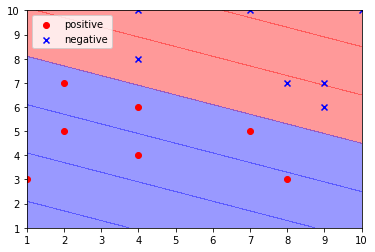

In [94]:
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])

plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.scatter(pos_x[:, 0], pos_x[:, 1], color="red", marker="o", label="positive")
plt.scatter(neg_x[:, 0], neg_x[:, 1], color="blue", marker="x", label="negative")
plt.legend(loc="upper left")
plt.show()

In [89]:
print(geometric_margin(w, np.array([8]), X, y))
print(geometric_margin(w, np.array([8.5]), X, y))

0.185695338177
0.64993368362
